## Point Estimates

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [12]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

#len(population_ages1)
#population_ages2
print(len(population_ages))
population_ages.mean()
np.sort(population_ages)

250000


array([18, 18, 18, ..., 80, 80, 81])

In [13]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 1000 values

print(len(sample_ages))
print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means

500
42.388


0.614372000000003

In [17]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )
for race in set(population_races):
    print( race + " proportion estimate:" )
    print( population_races.count(race)/250000 )

hispanic proportion estimate:
0.192
white proportion estimate:
0.379
black proportion estimate:
0.231
other proportion estimate:
0.099
asian proportion estimate:
0.099
hispanic proportion estimate:
0.2
white proportion estimate:
0.4
black proportion estimate:
0.2
other proportion estimate:
0.1
asian proportion estimate:
0.1


## Sampling Distributions and The Central Limit Theorem

-0.12008483603917186


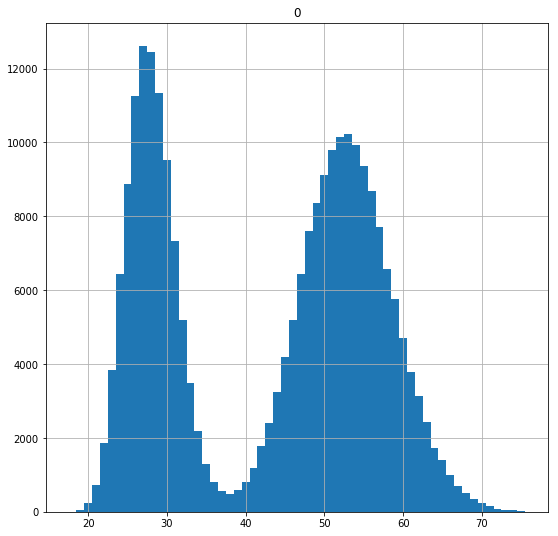

In [18]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages) )

-0.056225282585406065


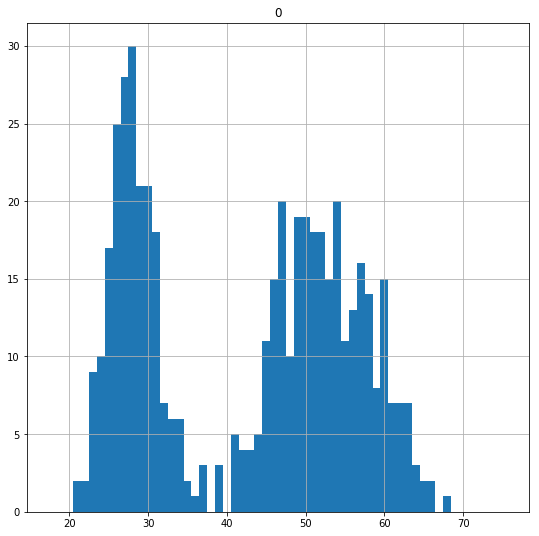

In [19]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(sample_ages) )

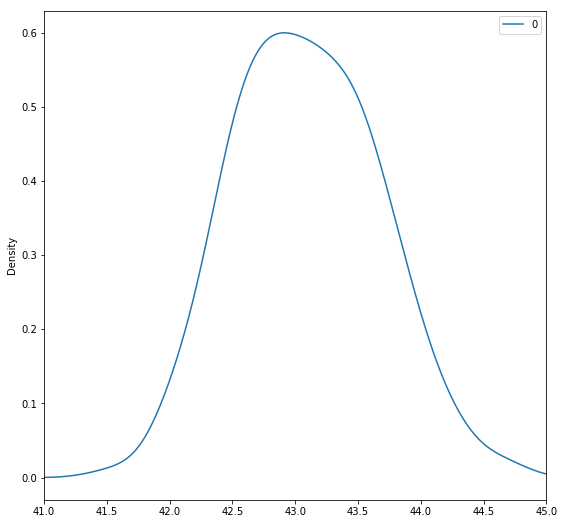

In [23]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45))   

In [24]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

## Confidence Interval

In [25]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


In [0]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

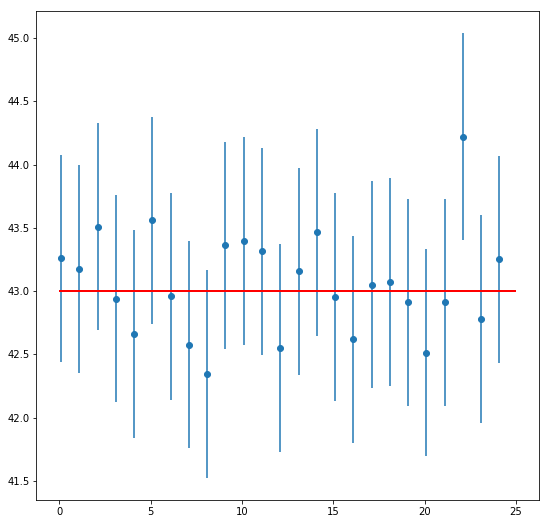

In [28]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

In [29]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


In [30]:
# Check the difference between critical values with a sample size of 1000
             
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

In [31]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.65147508161371, 48.108524918386294)

In [32]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [33]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)